In [1]:
!pwd

/home/jakubkala/IAD/semestr-2/data-visualisation/ncn-grants


In [2]:
import pandas as pd
import numpy as np

In [3]:
!ls data/

descriptors.csv		grants_preprocessed.csv  ncn_2019.csv	   README.md
grants_description.csv	grants_small.csv	 ncn_fill.csv
grants_larger.csv	harmonogram		 overall_data.csv


In [4]:
grants = pd.read_csv("data/grants_preprocessed.csv")

In [5]:
grants.head()

,id,title,institution,project_status,comp,comp_date,comp_edition,comp_name,subpanel_code_type,subpanel_code_number,subpanel_description,budget_pln,duration_months,coinvestigators_cnt
0,2011/01/B/HS1/00522,"Czy istnieje coś, co zwiemy moralnym charakter...","UNIWERSYTET GDAŃSKI, Wydział Nauk Społecznych,...",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,37560.0,30,1.0
1,2011/01/B/HS1/00559,Odnowa czy herezja? Stosunek fenomenologii wsp...,"Uniwersytet Gdański, Wydział Nauk Społecznych",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,39000.0,36,1.0
2,2011/01/B/HS1/00771,Status ziemi Izraela w Księdze Ezechiela i jeg...,"Katolicki Uniwersytet Lubelski Jana Pawła II, ...",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,58908.0,30,1.0
3,2011/01/B/HS1/00944,Relacje tolerancji w kratach i ich wykorzystanie,"Akademia im. Jana Długosza w Częstochowie, Wyd...",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,69850.0,24,3.0
4,2011/01/B/HS1/00954,Jezus i chrześcijanie w źródłach rabinicznych ...,"UNIWERSYTET JAGIELLOŃSKI, Wydział Filozoficzny",Status projektu: Projekt rozliczony,OPUS 1,2011-03-15,1.0,OPUS,HS,1,Fundamentalne pytania o naturę człowieka i ota...,59800.0,12,16.0


In [6]:
grants['year'] = grants.comp_date.apply(lambda x: x[:4])

In [7]:
plot1_data = grants.loc[:, ['subpanel_code_type', 'year', 'budget_pln']].groupby(['subpanel_code_type', 'year']).sum()
plot1_data.budget_pln /= 10**6

In [8]:
plot1_data.reset_index(inplace=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.palplot(sns.color_palette("GnBu_d"))
sns.set_palette("GnBu_d")
plt.figure(figsize=(2, 13))

font = {'size'   : 16}

plt.rc('font', **font)

In [10]:
typ_konkursu = {
        "HS" : "nauki humanistyczne, społeczne i o sztuce",
        "ST" : "nauki ścisłe i techniczne",
        "NZ" : "nauki o życiu"
}


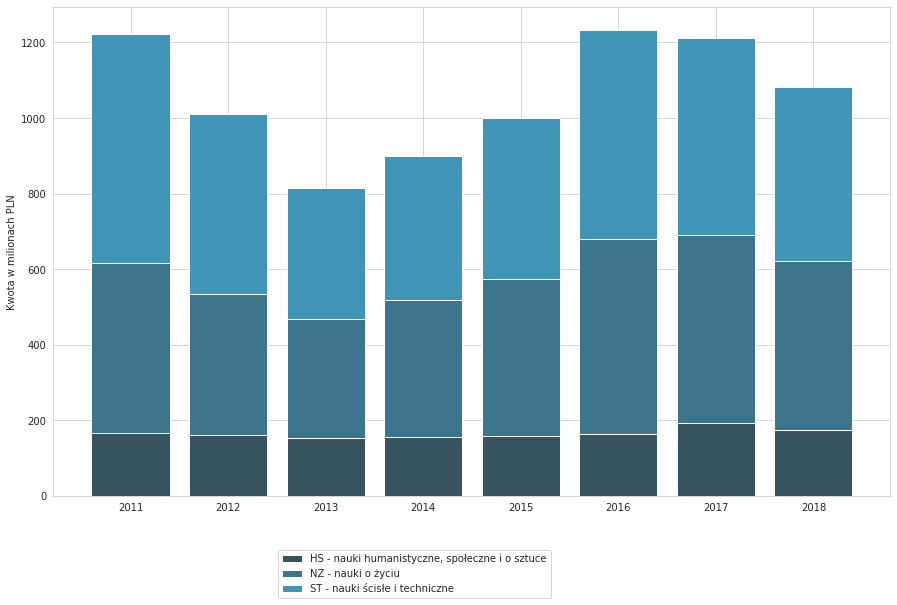

In [11]:
bottom = plot1_data.loc[plot1_data.subpanel_code_type == 'ST', 'budget_pln'] * 0
bottom = np.array(bottom)


plt.figure(figsize=(15, 9))
for panel in list(plot1_data.subpanel_code_type.unique()):
    
    df = plot1_data.loc[plot1_data.subpanel_code_type == panel, :]
    plt.bar(df.year, df.budget_pln , bottom = bottom, label=panel + " - " + str(typ_konkursu[panel]))
    bottom += np.array(df.budget_pln)

    plt.ylabel('Kwota w milionach PLN')
    
#plt.title('Budget by panel')
plt.legend(bbox_to_anchor=(0.6, -0.1))

plt.savefig('./plots/verticalbarchart.png')
plt.show()

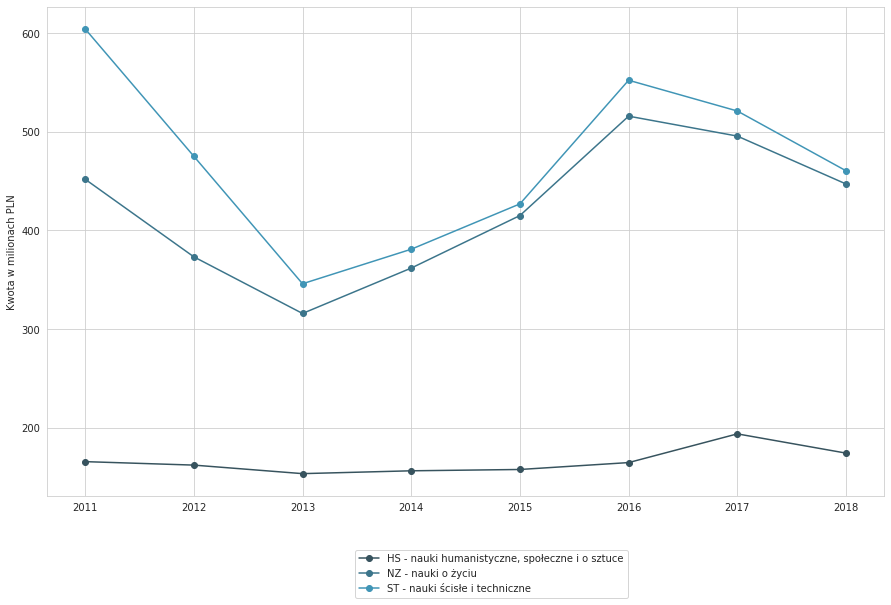

In [12]:
plt.figure(figsize=(15, 9))

for panel in list(plot1_data.subpanel_code_type.unique()):
    
    df = plot1_data.loc[plot1_data.subpanel_code_type == panel, :]
    plt.plot(df.year, df.budget_pln,
             label=panel + " - " + str(typ_konkursu[panel]),
             marker='o')
    plt.ylabel('Kwota w milionach PLN')
    
#plt.title('Łączna suma grantów w ramach konkursów NCN')
plt.legend(bbox_to_anchor=(0.7, -0.1))

plt.savefig('./plots/lineplot.png')
plt.show()


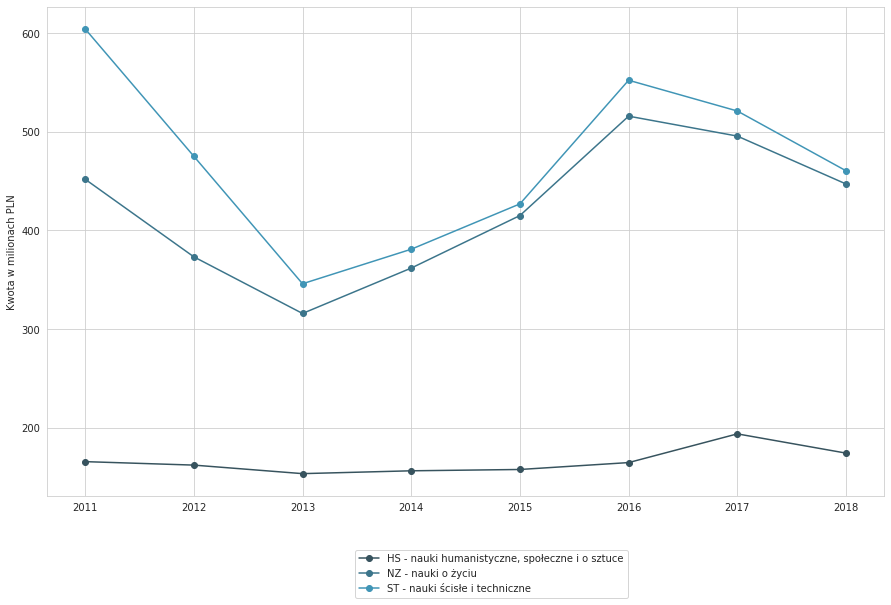

In [13]:
plt.figure(figsize=(15, 9))

for panel in list(plot1_data.subpanel_code_type.unique()):
    
    df = plot1_data.loc[plot1_data.subpanel_code_type == panel, :]
    plt.plot(df.year, df.budget_pln,
             label=panel + " - " + str(typ_konkursu[panel]),
             marker='o')
    plt.ylabel('Kwota w milionach PLN')
    
#plt.title('Łączna suma grantów w ramach konkursów NCN')
plt.legend(bbox_to_anchor=(0.7, -0.1))

plt.savefig('./plots/lineplot.png')
plt.show()


In [14]:
plot1_data.groupby('subpanel_code_type').sum()

,budget_pln
subpanel_code_type,
HS,1326.251149
NZ,3376.958201
ST,3768.027727


In [15]:
sum(plot1_data.budget_pln)

8471.237076999998

In [16]:
grants.groupby('subpanel_code_type').count()['id']

subpanel_code_type
HS    5116
NZ    5527
ST    7345
Name: id, dtype: int64

In [17]:
grants.shape[0]

17988

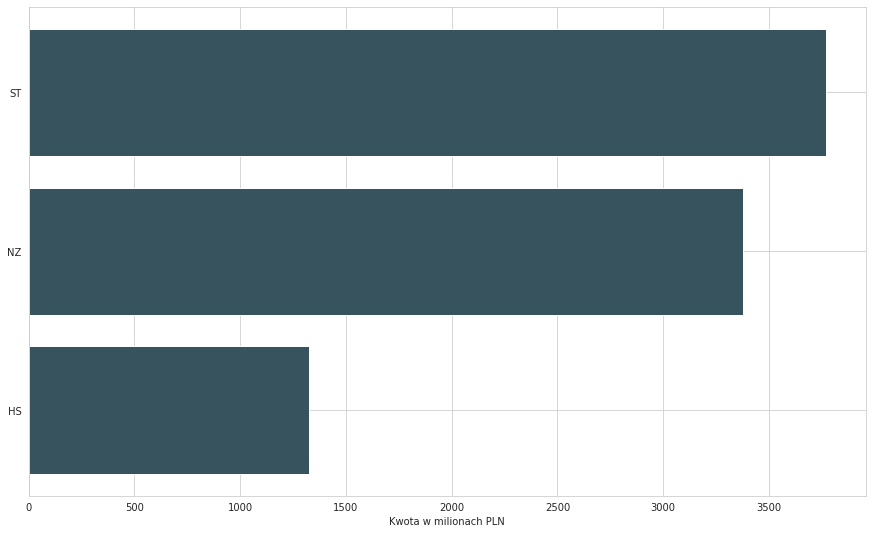

In [18]:
plot2_data = grants.groupby('subpanel_code_type').sum().loc[:, ['budget_pln']].reset_index()

plot2_data = plot2_data.sort_values('budget_pln', ascending=True).reset_index(drop=True)

plot2_data.budget_pln /= 10 ** 6


plt.figure(figsize=(15, 9))
plt.barh(plot2_data.subpanel_code_type, plot2_data.budget_pln)
#plt.title('Łączna wartość konkursów NCN dla danego działu')
plt.xlabel('Kwota w milionach PLN')


plt.savefig('./plots/horizontalbarchart.png')
plt.show()

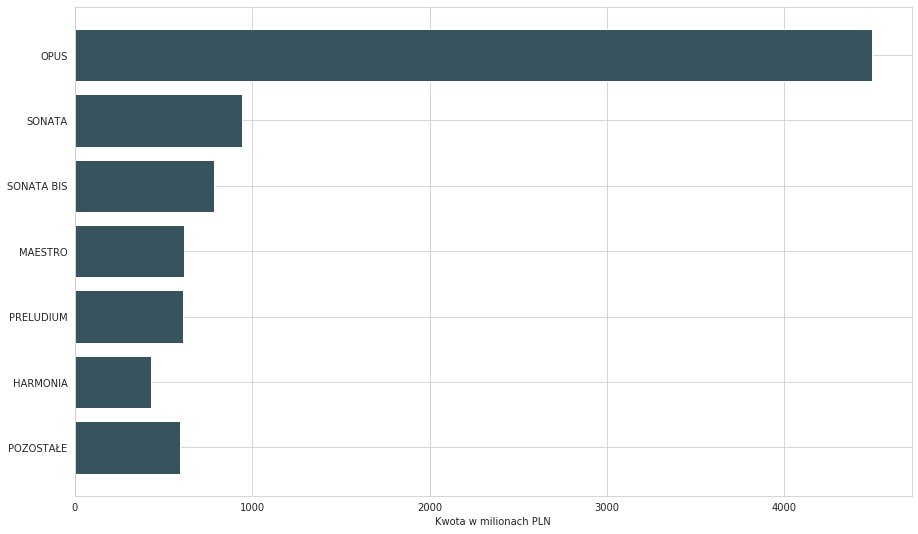

In [19]:
plot3_data = grants.groupby('comp_name').sum().loc[:, ['budget_pln']].reset_index()

threshold = float(plot3_data.loc[plot3_data.comp_name == 'HARMONIA', 'budget_pln']) - 1
suma_pozostalych_konkursow = sum(plot3_data.budget_pln.loc[plot3_data.budget_pln.le(threshold)])
plot3_data = plot3_data.append({"comp_name" : "POZOSTAŁE", "budget_pln" : suma_pozostalych_konkursow},
                               ignore_index=True)

plot3_data = plot3_data.loc[plot3_data.budget_pln.ge(threshold), :]

plot3_data = plot3_data.sort_values('budget_pln', ascending=True).reset_index(drop=True)

plot3_data.budget_pln /= 10 ** 6
plot3_data.loc[0], plot3_data.loc[1] = plot3_data.loc[1], plot3_data.loc[0] 


plt.figure(figsize=(15, 9))
plt.barh(plot3_data.comp_name, plot3_data.budget_pln)
#plt.title('Łączna wartość konkursów NCN dla danego działu')
plt.xlabel('Kwota w milionach PLN')


plt.savefig('./plots/horizontalbarchart-konkursy.png')

plt.show()

In [20]:
data = pd.read_csv("./data/grants_preprocessed.csv")
names = "CEUS-UNISONO|OPUS|PRELUDIUM|POLS|SONATA BIS|MAESTRO|DAINA|" + \
            "PRELUDIUM BIS|SONATA|BEETHOVEN|SONATINA|SHENG|DIOSCURI|MINIATURA"
data = data.loc[data['comp_name'].str.contains(names, case = False)]
cond_pan = data['institution'].str.contains("PAN|Polskiej Akademii Nauk")
cond_uni = data['institution'].str.contains('uniwersytet|politechnika|akademi|wyższa|szkoła|uczelnia', case=False)
cond_uni = ~cond_pan & cond_uni
cond_ins = data['institution'].str.contains('instytut|badań', case=False)
cond_ins = ~cond_pan & ~cond_uni & cond_ins

data['institution_type'] = np.where(cond_pan, 'PAN', 'Inne')
data['institution_type'] = np.where(cond_uni, 'Uczelnia wyższa', data['institution_type'])
data['institution_type'] = np.where(cond_ins, 'Instytut badawczy', data['institution_type'])
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(data.loc[data['institution_type'] == 'Inne']['institution'])
data = data.groupby(["comp_name", "institution_type"]).agg({'budget_pln': 'mean'})
data.reset_index(inplace=True)
data.budget_pln /= 10**6

In [ ]:
plots = []
comps = data.comp_name.unique()
types = data.institution_type.unique()
ind = len(comps)
width = 0.2

plt.figure(figsize=(15, 9))

fig, ax = plt.subplots(figsize=(15, 9))

for i in range(len(types)):
    df = data.loc[data.institution_type == types[i], :]
    p = ax.barh(np.arange(len(comps)) + (i-1) * width, df.budget_pln, width)
    plots.append(p[0])

ax.set_yticks(np.arange(len(comps)) + width / 2)
ax.set_yticklabels(comps)    
ax.set_xlabel("Łączna kwota w milionach PLN")
ax.legend(tuple(plots)[::-1], tuple(types)[::-1])   

plt.savefig('./plots/horizontalbarchart-podzial-konkursy.png')
plt.show()

In [ ]:
plot4_data = grants.loc[:, ['subpanel_code_type', 'year', 'id']].groupby(['subpanel_code_type', 'year']).count()
plot4_data = plot4_data.reset_index()

In [ ]:
plt.figure(figsize=(15, 9))

for panel in list(plot4_data.subpanel_code_type.unique()):
    
    df = plot4_data.loc[plot4_data.subpanel_code_type == panel, :]
    plt.plot(df.year, df.id,
             label=panel + " - " + str(typ_konkursu[panel]),
             marker='o')
    plt.ylabel('Liczba wniosków')
    
#plt.title('Łączna suma grantów w ramach konkursów NCN')
plt.legend(bbox_to_anchor=(0.7, -0.1))

plt.savefig('./plots/lineplot_liczba_wnioskow.png')
plt.show()
